In [1]:
bookimport warnings
warnings.filterwarnings('ignore')

In [2]:
# Installing wordcloud for visualisation.
!pip install wordcloud

In [3]:
# Importing the requisite packages used.
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from wordcloud import WordCloud

In [4]:
# Extracting the Twitter US Airline Dataset of tweets for Sentimental Analysis.
csv_Path = "Tweets.csv"
data_Frame = pd.read_csv(csv_Path)

# Replicating the dataset to perform operations on it.
data_Set = data_Frame.copy()

In [5]:
# Displaying the shape of the dataset.
data_Set.shape

(14640, 15)

In [6]:
# Print the brief description of the dataset.
data_Set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [7]:
# To configure the float formatting of pandas DataFrame.
pd.options.display.float_format = '{:.5f}'.format

# Convert 'tweet_id' to object type for memory optimization and data handling flexibility.
data_Set['tweet_id'] = data_Set['tweet_id'].astype('object')

# Convert 'tweet_created' into datetime format that allows us to evaluate it as a time series.
data_Set['tweet_created'] = pd.to_datetime(data_Set['tweet_created'])

In [8]:
# Print the brief description of the dataset.
data_Set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype                                 
---  ------                        --------------  -----                                 
 0   tweet_id                      14640 non-null  object                                
 1   airline_sentiment             14640 non-null  object                                
 2   airline_sentiment_confidence  14640 non-null  float64                               
 3   negativereason                9178 non-null   object                                
 4   negativereason_confidence     10522 non-null  float64                               
 5   airline                       14640 non-null  object                                
 6   airline_sentiment_gold        40 non-null     object                                
 7   name                          14640 non-null  object                        

In [9]:
# Creating a new column 'tweet_dates' with only date in the dataset.
data_Set['tweet_dates'] = data_Set['tweet_created'].dt.date
data_Set['tweet_dates'].value_counts()

# Displaying the count of tweets of each unique date from the dataset.
by_Unique_Dates = data_Set.groupby(pd.Grouper(key='tweet_created', axis=0, freq='D')).count()['tweet_id']
by_Unique_Dates

tweet_created
2015-02-16 00:00:00-08:00       4
2015-02-17 00:00:00-08:00    1408
2015-02-18 00:00:00-08:00    1344
2015-02-19 00:00:00-08:00    1376
2015-02-20 00:00:00-08:00    1500
2015-02-21 00:00:00-08:00    1557
2015-02-22 00:00:00-08:00    3079
2015-02-23 00:00:00-08:00    3028
2015-02-24 00:00:00-08:00    1344
Freq: D, Name: tweet_id, dtype: int64

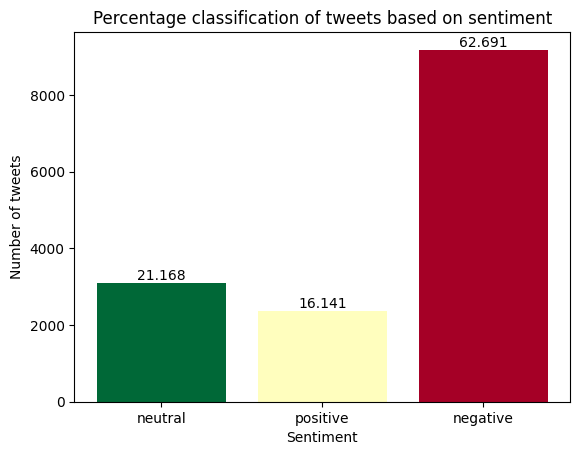

In [10]:
# Bar graph visualisation of classification of tweets based on sentiments.
x_sentiments = data_Set['airline_sentiment'].unique()
y_tweet_count = []

for sentiment in x_sentiments:
    count = (data_Set['airline_sentiment'] == sentiment).sum()
    y_tweet_count.append(count)

total_count = sum(y_tweet_count)

percentage = [round((count / total_count)*100, 3) for count in y_tweet_count]

# Plotting the bar graph based on the obtained data.
plt.bar(x_sentiments,y_tweet_count, color=plt.cm.RdYlGn_r(np.linspace(0, 1, len(x_sentiments))))
for x, y, sp in zip(x_sentiments, y_tweet_count, percentage):
   plt.text(x, y, sp, horizontalalignment='center', verticalalignment='bottom')
plt.title('Percentage classification of tweets based on sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of tweets')
plt.show()

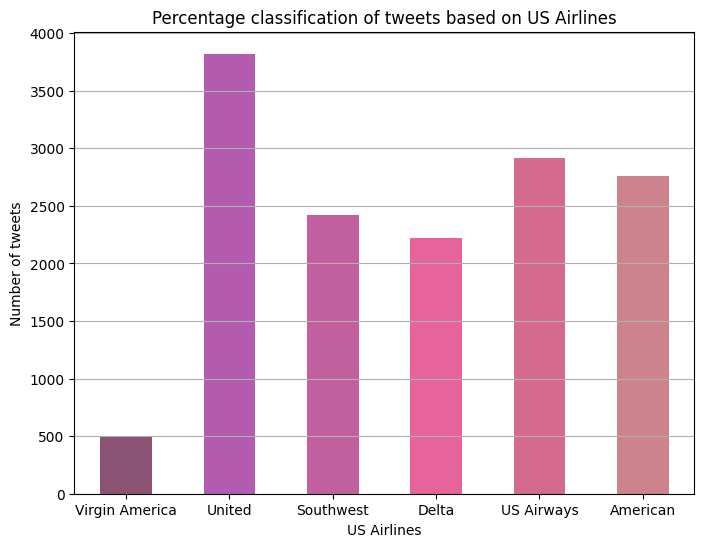

In [11]:
# Bar graph visualisation of classification of tweets based on different airlines.
plt.figure(figsize=(8, 6))
data_Set['airline'].value_counts(sort=False).plot.bar(rot = 0, color = ['#8A5374','#B35BAE','#C25F9E', '#E6639B','#D46A8D','#CC838C'] )
plt.grid(axis='y')
plt.title('Percentage classification of tweets based on US Airlines')
plt.xlabel('US Airlines')
plt.ylabel('Number of tweets')
plt.show()

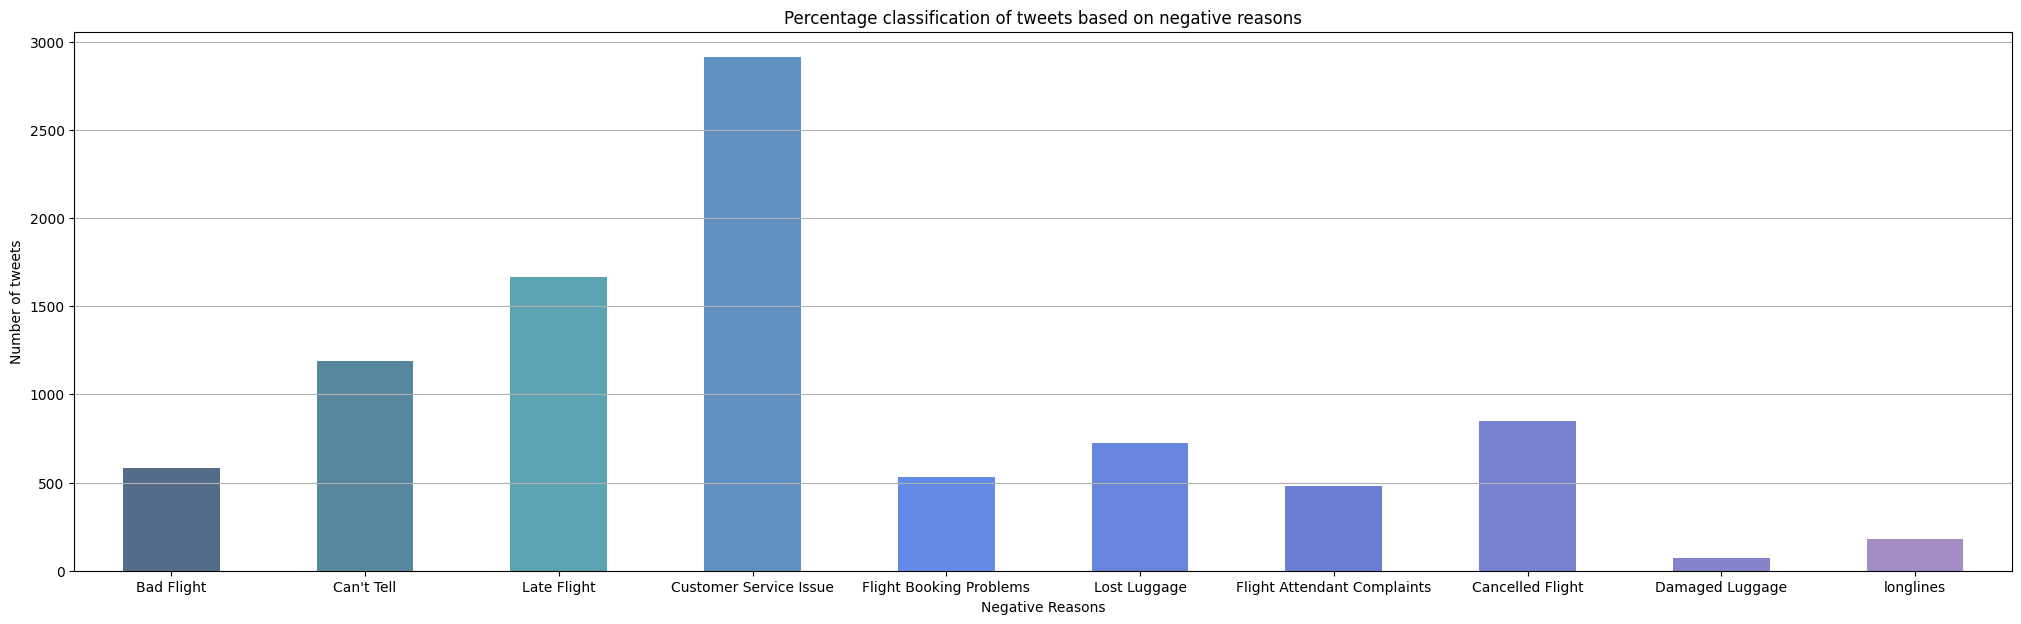

In [12]:
# Bar graph visualisation of classification of tweets based on negative reasons in the tweets.
plt.figure(figsize=(25, 7))
data_Set['negativereason'].value_counts(sort=False).plot.bar(rot = 0, color = ['#536C8A', '#57879F', '#5BA2B3', '#5F90C2', '#638AE6', '#6785DD', '#6A7FD4', '#7781D0', '#8483CC', '#A38BC4'] )
plt.grid(axis='y')
plt.title('Percentage classification of tweets based on negative reasons')
plt.xlabel('Negative Reasons')
plt.ylabel('Number of tweets')
plt.show()

In [13]:
# Creating datasets with tweets with individual specific sentiments - negative, positive and neutral.
df_filtered = data_Set[['airline_sentiment','tweet_created','airline', 'tweet_dates']]
df_filtered_neg = df_filtered[df_filtered['airline_sentiment'] == 'negative']
df_filtered_pos = df_filtered[df_filtered['airline_sentiment'] == 'positive']
df_filtered_neut = df_filtered[df_filtered['airline_sentiment'] == 'neutral']

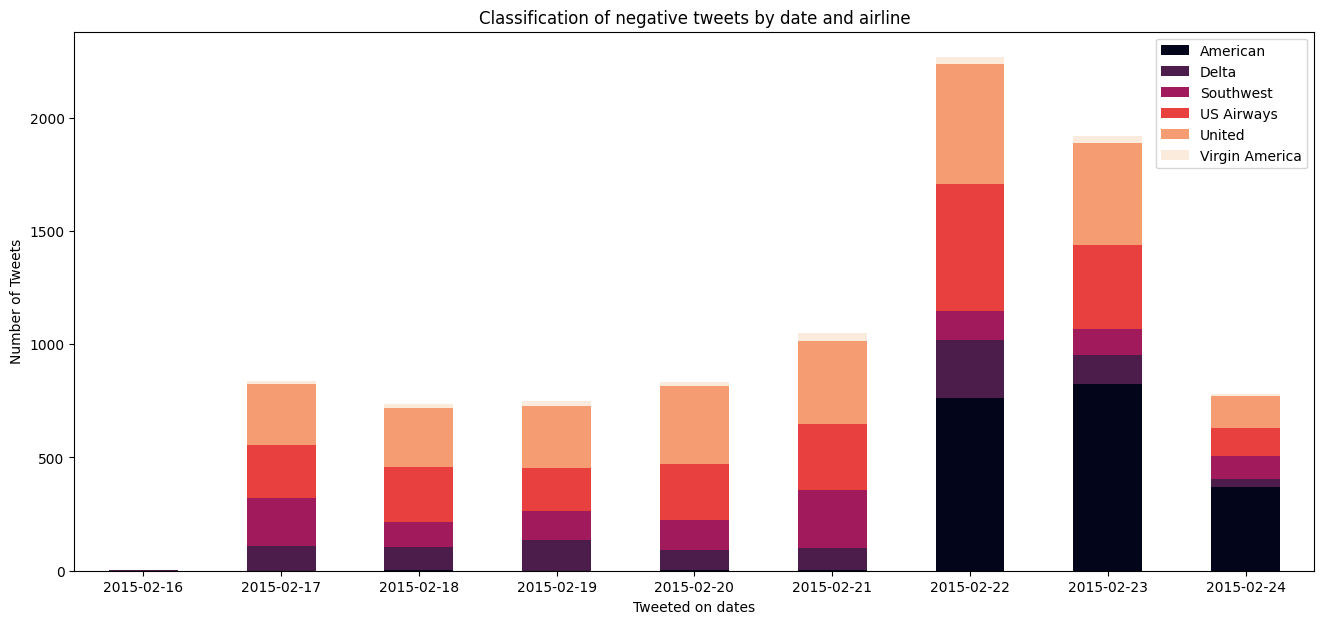

In [14]:
# Stacked bar graph visualisation of classification of negative tweets of that specific day for different airlines.
df_neg_date = df_filtered_neg.groupby(['tweet_dates', 'airline']).size().unstack(fill_value=0)

ax = df_neg_date.plot(kind='bar', stacked=True, figsize=(16, 7), rot=0, colormap='rocket')
plt.title('Classification of negative tweets by date and airline')
plt.xlabel('Tweeted on dates')
plt.ylabel('Number of Tweets')
plt.legend()
plt.show()

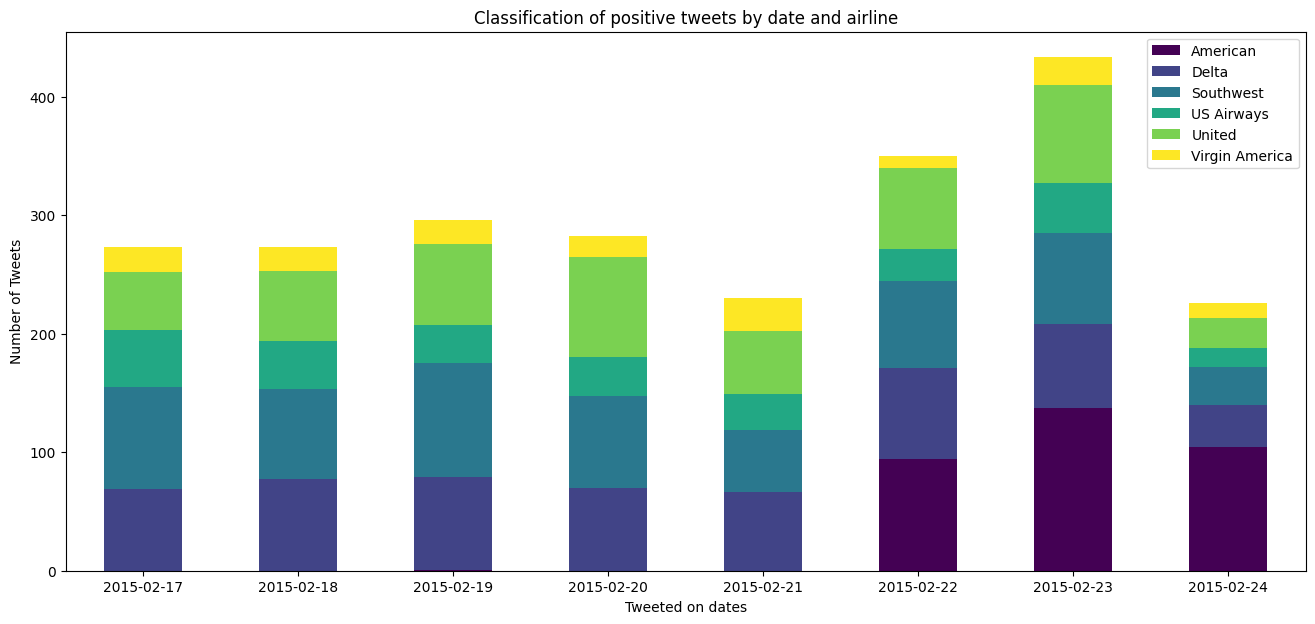

In [15]:
# Stacked bar graph visualisation of classification of positive tweets of that specific day for different airlines.
df_pos_date = df_filtered_pos.groupby(['tweet_dates', 'airline']).size().unstack(fill_value=0)

ax = df_pos_date.plot(kind='bar', stacked=True, figsize=(16, 7), rot=0, colormap='viridis')
plt.title('Classification of positive tweets by date and airline')
plt.xlabel('Tweeted on dates')
plt.ylabel('Number of Tweets')
plt.legend()
plt.show()

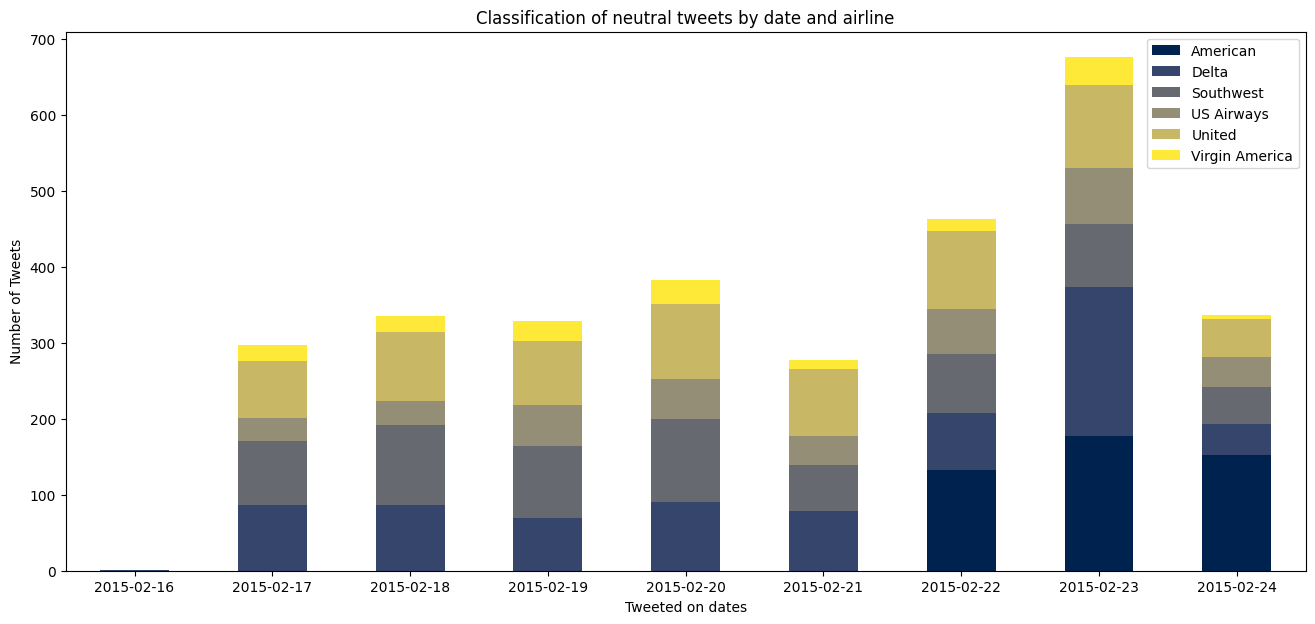

In [16]:
# Stacked bar graph visualisation of classification of neutral tweets of that specific day for different airlines.
df_neut_date = df_filtered_neut.groupby(['tweet_dates', 'airline']).size().unstack(fill_value=0)

ax = df_neut_date.plot(kind='bar', stacked=True, figsize=(16, 7), rot=0, colormap='cividis')
plt.title('Classification of neutral tweets by date and airline')
plt.xlabel('Tweeted on dates')
plt.ylabel('Number of Tweets')
plt.legend()
plt.show()

In [17]:
# Show the number of tweets by sentiment per airline.
data_Set.groupby('airline')['airline_sentiment'].value_counts()

airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
Name: airline_sentiment, dtype: int64

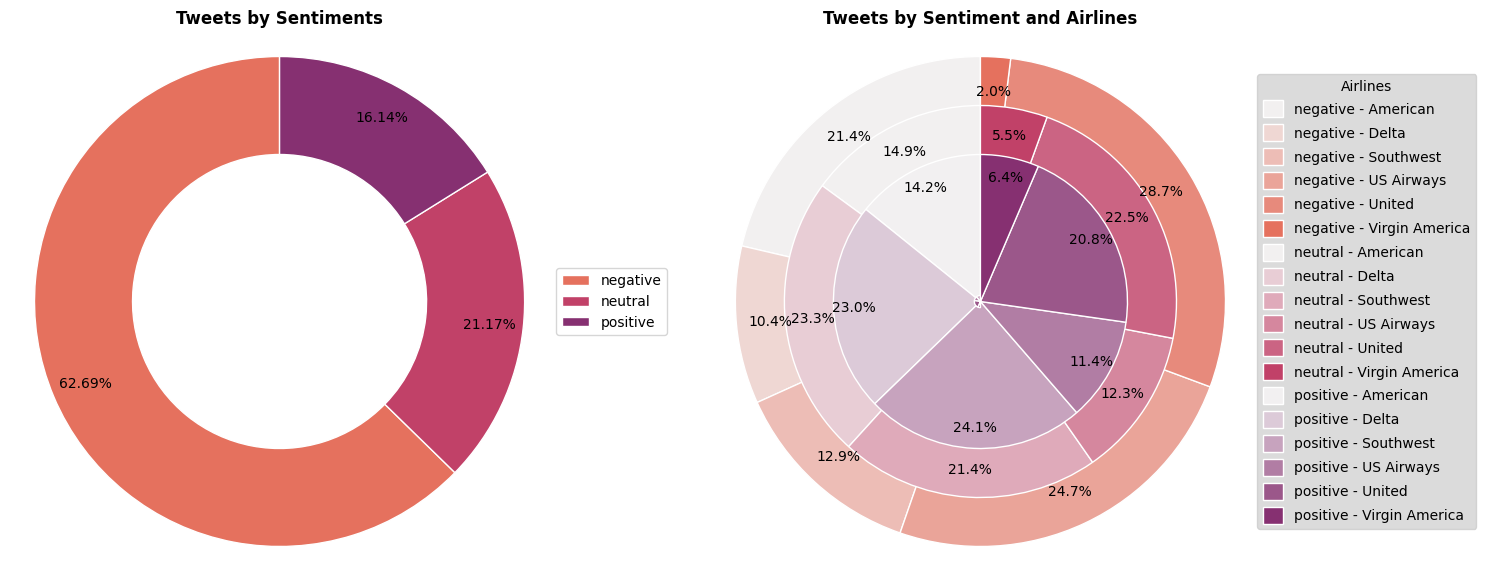

In [18]:
# Pie graph and Stacked Pie graph visualisation of classification of tweets based on sentiments for different airlines.
tweet_counts = data_Set.groupby(['airline_sentiment', 'airline']).size().reset_index(name='count')
pivotedDF = tweet_counts.pivot(index='airline_sentiment', columns='airline', values='count').fillna(0)

pie_palette = sns.color_palette("flare", len(pivotedDF.index))
fig, axs = plt.subplots(1, 2, figsize=(16, 7))

# First subplot is Sentiments of tweets of specific airline.
labels1 = pivotedDF.index
sizes1 = pivotedDF.sum(axis=1)
wedges, texts, autotexts = axs[0].pie(sizes1, labels=None, autopct='%1.2f%%',
            colors=pie_palette, startangle=90, pctdistance=0.86,
            wedgeprops=dict(width=0.4, edgecolor='w'))

axs[0].axis('equal')
axs[0].set_title('Tweets by Sentiments', weight='bold')

# Create legends for first subplot.
legLabels = [f"{label}"
                 for label, size in zip(labels1, sizes1)]
legLabels.extend([f"{airline} - {label}" for airline in pivotedDF.columns for label in labels1])
axs[0].legend(legLabels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Second subplot is number of tweets by sentiment for each airline.
labels2 = pivotedDF.columns

for i, airline in enumerate(pivotedDF.index):
    sizes2 = pivotedDF.iloc[i].values
    wedges, texts, autotexts = axs[1].pie(sizes2, labels=None,
                colors=sns.light_palette(pie_palette[i], n_colors=len(labels2)),
                radius=0.8 - i * 0.16, autopct='%1.1f%%', startangle=90, pctdistance=0.86,
                wedgeprops=dict(width=0.5, edgecolor='w'))
    for text, autotext in zip(texts, autotexts):
        text.set(size=10)
        autotext.set(size=10)

# Create legends for the second subplot with sentiment - airline labels.
legLabels2 = [
    f"{sentiment} - {airline}"
    for sentiment in pivotedDF.index
    for airline in pivotedDF.columns
]
legColors = [
    sns.light_palette(pie_palette[i], n_colors=len(labels2))[j]
    for i in range(len(pivotedDF.index))
    for j in range(len(labels2))
]
axs[1].legend(legLabels2, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1),
               labels=legLabels2, title="Airlines",
               handlelength=1.5, handleheight=1.5, facecolor='lightgray')
axs[1].axis('equal')
axs[1].set_title('Tweets by Sentiment and Airlines', weight='bold')

plt.subplots_adjust(wspace=0.3)
plt.show()


In [19]:
# Display number of tweets for each airline.
data_Set.airline.value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

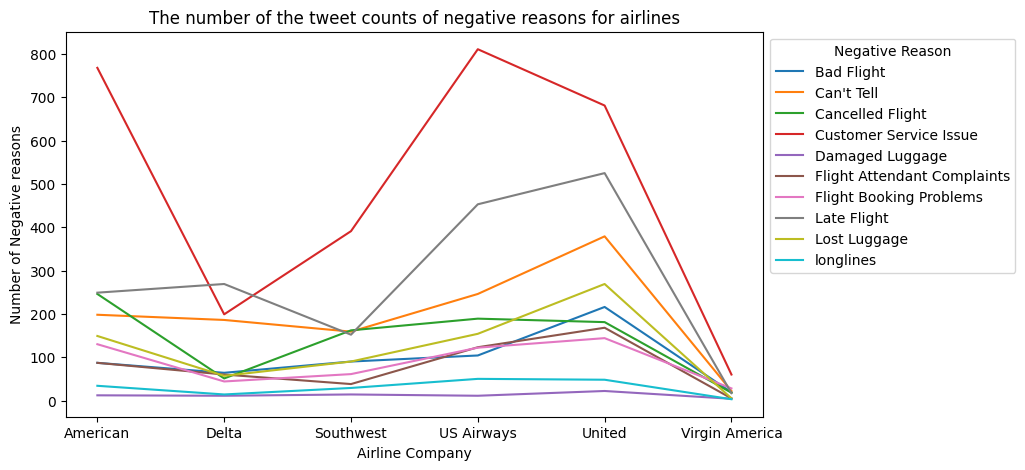

In [20]:
# Line graph visualisation of classification based on the negative reasons mentioned in the tweets for different airlines.
negative_reasons = data_Set.groupby(['airline', 'negativereason']).size().unstack(fill_value=0)

# Creating the line plot based on the obtained information.
negative_reasons.plot(kind='line', figsize=(9, 5))
plt.xlabel('Airline Company')
plt.ylabel('Number of Negative reasons')
plt.title("The number of the tweet counts of negative reasons for airlines")
plt.legend(title='Negative Reason', bbox_to_anchor=(1, 1))
plt.show()

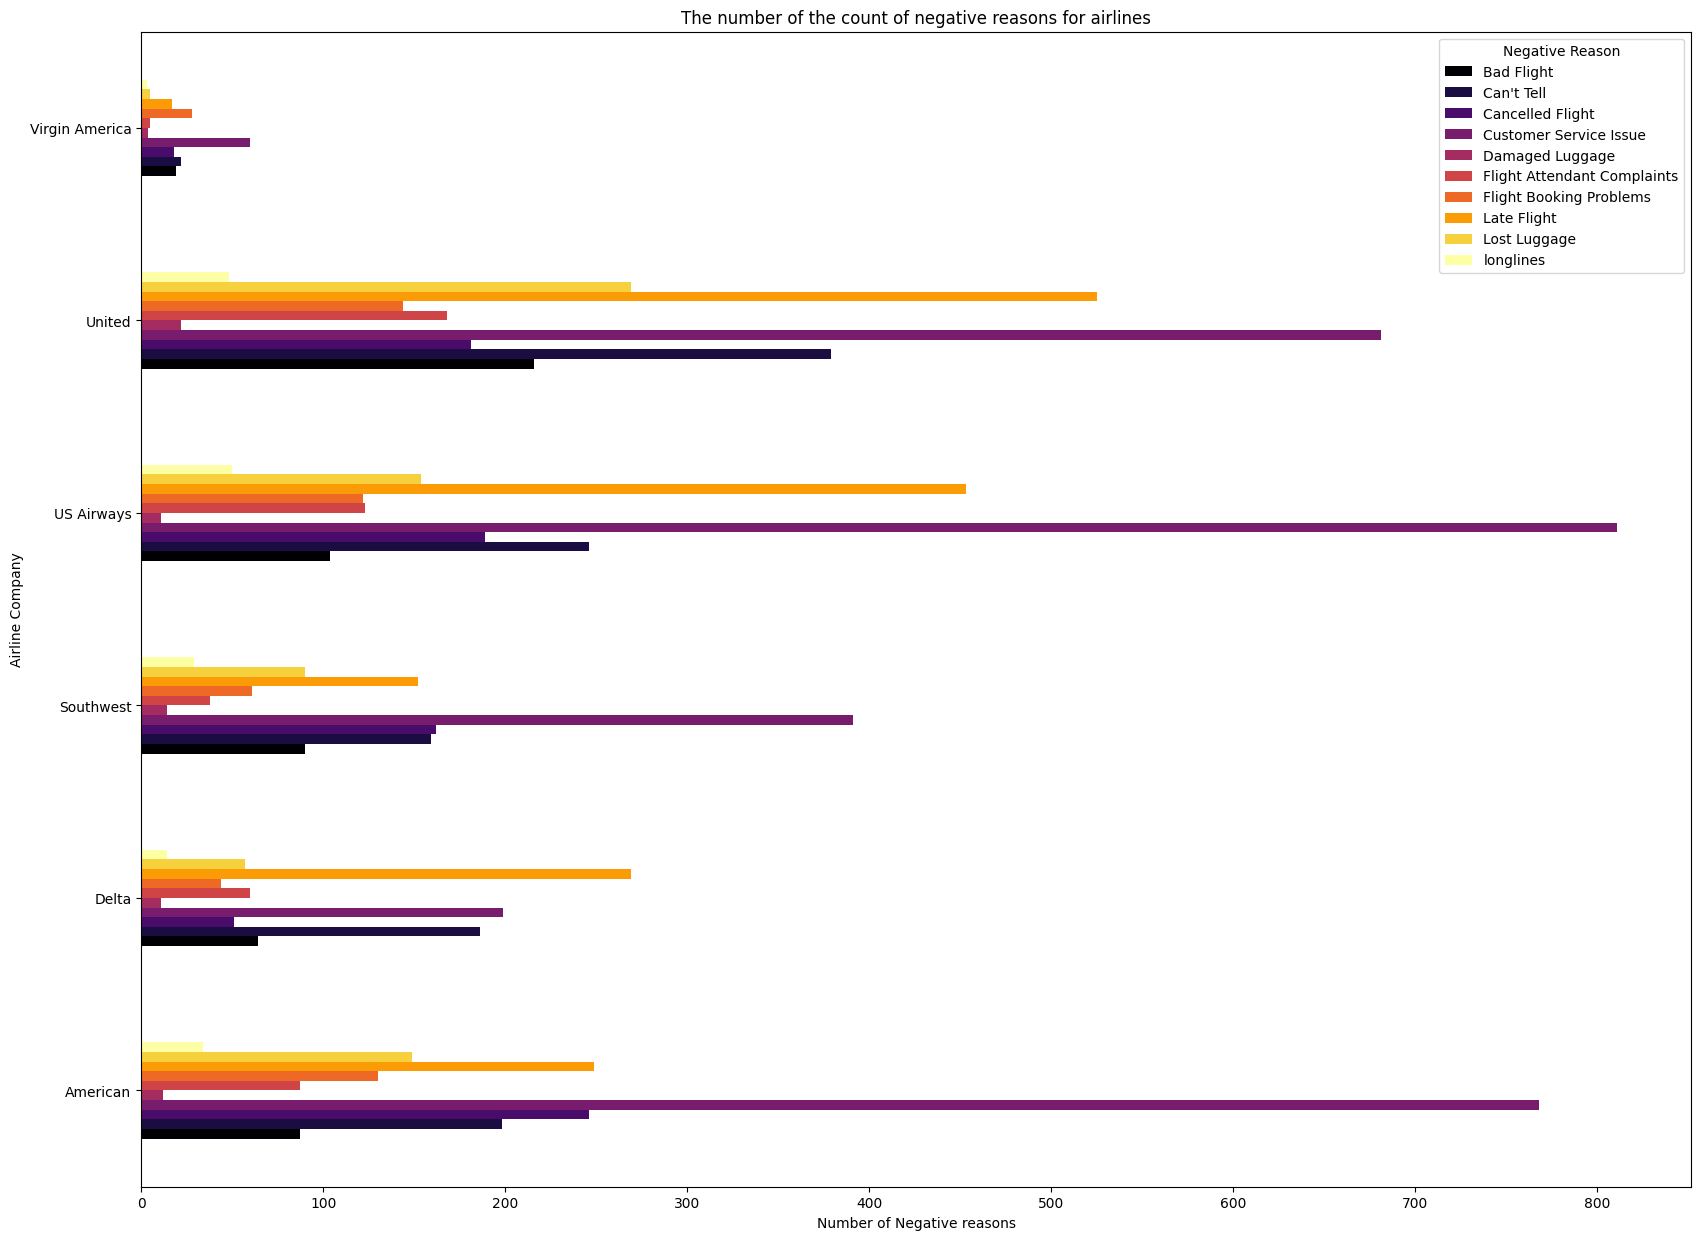

In [21]:
# Multiple horizontal bar graph visualisation of classification based on the negative reasons mentioned in the tweets for different airlines.
airline_negreasons = data_Set.groupby(['airline', 'negativereason']).size().unstack(fill_value=0)
airline_negreasons.plot(kind='barh', figsize=(20, 15), stacked=False, cmap='inferno')

plt.xlabel('Number of Negative reasons')
plt.ylabel('Airline Company')
plt.title("The number of the count of negative reasons for airlines")
plt.legend(title='Negative Reason', bbox_to_anchor=(1, 1))
plt.show()

In [22]:
# Importing nltk - Natural Language toolkit.
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> book


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package brown to /root/nltk_data...
       |   Unzipping corpora/brown.zip.
       | Downloading package chat80 to /root/nltk_data...
       |   Unzipping corpora/chat80.zip.
       | Downloading package cmudict to /root/nltk_data...
       |   Unzipping corpora/cmudict.zip.
       | Downloading package conll2000 to /root/nltk_data...
       |   Unzipping corpora/conll2000.zip.
       | Downloading package conll2002 to /root/nltk_data...
       |   Unzipping corpora/conll2002.zip.
       | Downloading package dependency_treebank to /root/nltk_data...
       |   Unzipping corpora/dependency_treebank.zip.
       | Downloading package genesis to /root/nltk_data...
       |   Unzipping corpora/genesis.zip.
       | Downloading package gutenberg to /root/nltk_data...
       |   Unzipping corpora/gutenberg.zip.
       | Downloading package ieer to /root/nltk_data...
   


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [23]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
# Installing contractions.
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 4.8 MB/s eta 0:00:00


In [25]:
# Importing the requisite packages used.
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
# Creating a list of all attributes of the dataset.
listOfColumns = data_Set.columns.to_list()

# Columns that are required for building the model.
modelColumns = ['airline_sentiment', 'text', 'airline']

droppedColumns = [col for col in listOfColumns if col not in modelColumns]
modelDataSet = data_Set.drop(columns = droppedColumns)

In [27]:
# Displaying the shape of the dataset.
modelDataSet.shape

(14640, 3)

In [28]:
# Displaying the initial 7 rows of the dataset.
pd.set_option('display.max_colwidth', None)
modelDataSet.head(n=25)

,airline_sentiment,airline,text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,Virgin America,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing about it
5,negative,Virgin America,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA
6,positive,Virgin America,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)"
7,neutral,Virgin America,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP"
8,positive,Virgin America,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,positive,Virgin America,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me."


In [29]:
# Importing the requisite packages used.
import re
import nltk
from nltk.corpus import stopwords
import contractions
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import unicodedata

In [30]:
pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 6.4 MB/s eta 0:00:00


In [31]:
import emoji

sample_text = "I love Python! 😍🐍❤️"
converted_text = emoji.demojize(sample_text)
print(converted_text)

I love Python! :smiling_face_with_heart-eyes::snake::red_heart:


In [32]:
import emoji

def convert_emojis_to_words(text):
    return emoji.demojize(text)

modelDataSet['text'] = modelDataSet['text'].apply(convert_emojis_to_words)

In [33]:
cl_df = modelDataSet[['airline_sentiment', 'airline', 'text']]
cl_df
cl_df.head(n=25)

,airline_sentiment,airline,text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,Virgin America,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing about it
5,negative,Virgin America,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA
6,positive,Virgin America,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)"
7,neutral,Virgin America,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP"
8,positive,Virgin America,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,positive,Virgin America,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me."


In [34]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import contractions
import emoji
import unicodedata

# Loading a custom list of stopwords as well as stopwords that are commonly used.
stopwords = stopwords.words('english')
customRemoveList = ['flight']
stopwords = list(set(stopwords)) + customRemoveList
lemmatize = WordNetLemmatizer()

# Function to clean and preprocess text.
def clean_and_preprocess_text(plain_txt):
    # Remove mentions.
    plain_txt = re.sub(r'@[\w]+', '', plain_txt)

    # Remove URLs.
    plain_txt = re.sub(r'http\S+', '', plain_txt)

    # Replace underscores with spaces.
    plain_txt = plain_txt.replace('_', ' ')

    # Remove non-alphabet characters.
    plain_txt = re.sub(r'[^a-zA-Z\s]', '', plain_txt)

    # Remove non-ASCII characters.
    plain_txt = re.sub(r'[^\x00-\x7F]+', '', plain_txt)

    # Convert to lowercase.
    words = plain_txt.lower().split()
    cleaned_text = ' '.join(words)

    # Fix contractions.
    cleaned_text = contractions.fix(cleaned_text)

    # Tokenize the text.
    text_tokens = word_tokenize(cleaned_text)

    # Remove non-ASCII characters.
    text_tokens = [unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
                   for word in text_tokens]

    # Convert to lowercase.
    text_tokens = [word.lower() for word in text_tokens]

    # Remove hashtags.
    text_tokens = [re.sub(r'#\w+', '', word) for word in text_tokens if re.sub(r'#\w+', '', word) != '']

    # Remove punctuation.
    text_tokens = [re.sub(r'[^\w\s]', '', word) for word in text_tokens if re.sub(r'[^\w\s]', '', word) != '']

    # Remove stopwords.
    text_tokens = [word for word in text_tokens if word not in stopwords]

    # Lemmatize words.
    text_tokens = [lemmatize.lemmatize(word, pos='v') for word in text_tokens]

    # Remove extra whitespaces.
    cleaned_text = ' '.join(text_tokens)
    cleaned_text = ' '.join(cleaned_text.split())

    return cleaned_text

# Apply clean_and_preprocess_text function to the 'text' column.
modelDataSet['cl_txt'] = modelDataSet['text'].apply(clean_and_preprocess_text)

cl_df = modelDataSet[['airline_sentiment', 'airline', 'cl_txt']]
cl_df


,airline_sentiment,airline,cl_txt
0,neutral,Virgin America,say
1,positive,Virgin America,plus add commercials experience tacky
2,neutral,Virgin America,today must mean need take another trip
3,negative,Virgin America,really aggressive blast obnoxious entertainment guests face amp little recourse
4,negative,Virgin America,really big bad thing
...,...,...,...
14635,positive,American,thank get different chicago
14636,negative,American,leave minutes late warn communication minutes late call shitty customer svc
14637,neutral,American,please bring american airlines blackberry
14638,negative,American,money change answer phone suggestions make commitment


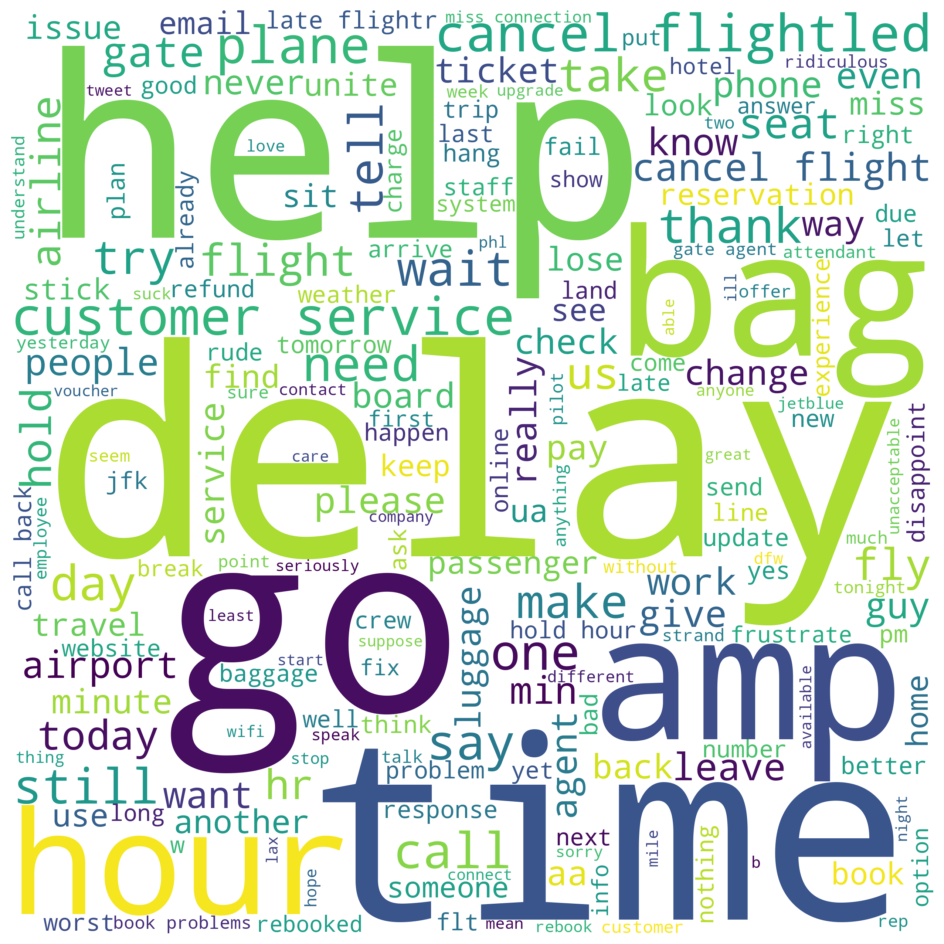

In [35]:
# Creating a wordcloud for all negative sentiment tweets.
text = ' '.join(cl_df[cl_df['airline_sentiment'] == 'negative']['cl_txt'])
cleaned_text = ' '.join(word for word in text.split()
                        if 'http' not in word
                        and not word.startswith('@')
                        and word.lower() != 'rt')

wordcloud = WordCloud(width=2500, height=2500, background_color='white').generate(cleaned_text)

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

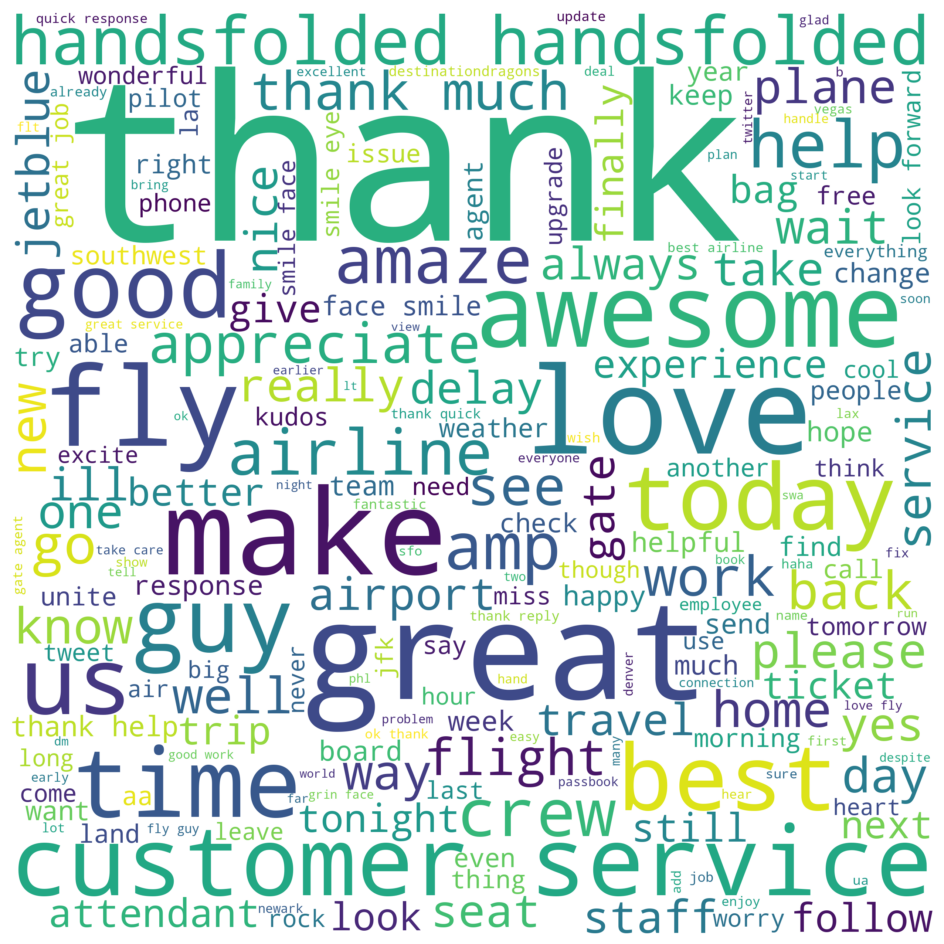

In [36]:
# Creating a wordcloud for all positive sentiment tweets.
text = ' '.join(cl_df[cl_df['airline_sentiment'] == 'positive']['cl_txt'])
cleaned_text = ' '.join(word for word in text.split()
                        if 'http' not in word
                        and not word.startswith('@')
                        and word.lower() != 'rt')

wordcloud = WordCloud(width=2500, height=2500, background_color='white').generate(cleaned_text)

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

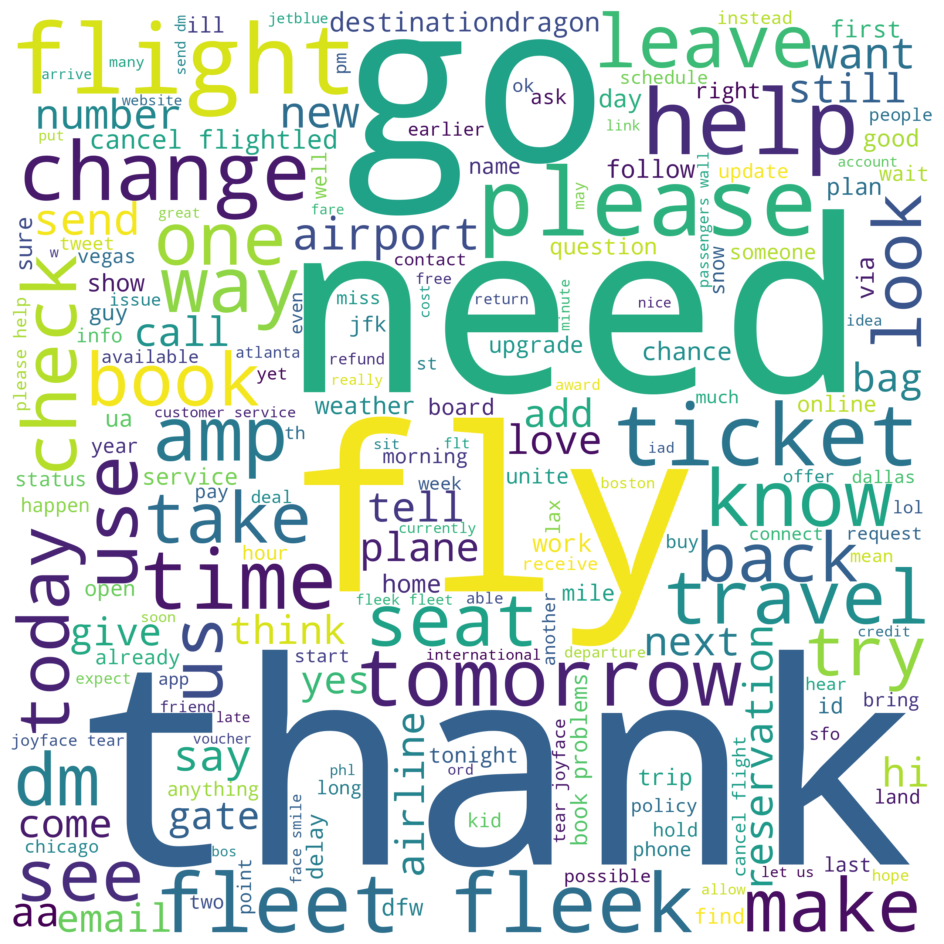

In [37]:
# Creating a wordcloud for all positive sentiment tweets.
text = ' '.join(cl_df[cl_df['airline_sentiment'] == 'neutral']['cl_txt'])
cleaned_text = ' '.join(word for word in text.split()
                        if 'http' not in word
                        and not word.startswith('@')
                        and word.lower() != 'rt')

wordcloud = WordCloud(width=2500, height=2500, background_color='white').generate(cleaned_text)

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [38]:
# Converting sentiments to 0s and 1s.
cl_df['airline_sentiment'] = cl_df['airline_sentiment'].apply(lambda x: 1 if x == "negative" else 0)
cl_df

,airline_sentiment,airline,cl_txt
0,0,Virgin America,say
1,0,Virgin America,plus add commercials experience tacky
2,0,Virgin America,today must mean need take another trip
3,1,Virgin America,really aggressive blast obnoxious entertainment guests face amp little recourse
4,1,Virgin America,really big bad thing
...,...,...,...
14635,0,American,thank get different chicago
14636,1,American,leave minutes late warn communication minutes late call shitty customer svc
14637,0,American,please bring american airlines blackberry
14638,1,American,money change answer phone suggestions make commitment


In [39]:
# Installing tensorflow.
!pip install tensorflow

In [40]:
# Importing the requisite packages used.
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Flatten
from sklearn.model_selection import train_test_split
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

In [41]:
texts = cl_df['cl_txt'].tolist()
labels = cl_df['airline_sentiment'].tolist()

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
max_sequence_length = 100
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)
word_index = tokenizer.word_index
num_words = len(word_index) + 1

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

In [43]:

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
!pip install transformers

In [45]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, BatchNormalization, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Layer
from tensorflow.keras.layers import Attention
from keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [46]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Bidirectional, BatchNormalization, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Layer
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Attention
from keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

class Attention_Layer(Layer):
    def __init__(self, use_scale=True, **kwargs):
        super(Attention_Layer, self).__init__(**kwargs)
        self.use_scale = use_scale
        self.attention_layer = Attention(use_scale=use_scale)

    def call(self, data_inputs, training=None):
        input_queries = data_inputs
        input_values = data_inputs
        att_outputs = self.attention_layer([input_queries, input_values])
        return att_outputs

num_words = len(word_index) + 1
model = tf.keras.models.Sequential()

model.add(Embedding(input_dim=num_words, output_dim=100, input_length=max_sequence_length, trainable=True))

model.add(Conv1D(256, kernel_size=5, activation="relu"))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Conv1D(256, kernel_size=3, activation="relu"))
model.add(MaxPooling1D(pool_size=2))

model.add(Attention_Layer(use_scale=True))

model.add(LSTM(128, return_sequences=True))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1090000   
                                                                 
 conv1d (Conv1D)             (None, 96, 256)           128256    
                                                                 
 max_pooling1d (MaxPooling1  (None, 48, 256)           0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 48, 256)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 46, 256)           196864    
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 23, 256)           0         
 g1D)                                                   

In [47]:
print(type(X_train))
print(type(y_train))
print(X_train.shape)

<class 'numpy.ndarray'>
<class 'list'>
(11712, 100)


In [48]:
import numpy as np
y_train = np.array(y_train)
y_test = np.array(y_test)
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/5
183/183 [==============================] - 110s 538ms/step - loss: 0.5191 - accuracy: 0.7415 - val_loss: 0.4196 - val_accuracy: 0.8234
Epoch 2/5
183/183 [==============================] - 76s 418ms/step - loss: 0.3364 - accuracy: 0.8683 - val_loss: 0.4002 - val_accuracy: 0.8299
Epoch 3/5
183/183 [==============================] - 76s 415ms/step - loss: 0.2296 - accuracy: 0.9139 - val_loss: 0.4404 - val_accuracy: 0.8180
Epoch 4/5
92/92 [==============================] - 7s 78ms/step - loss: 0.4002 - accuracy: 0.8299
Test Loss: 0.4002
Test Accuracy: 82.99%


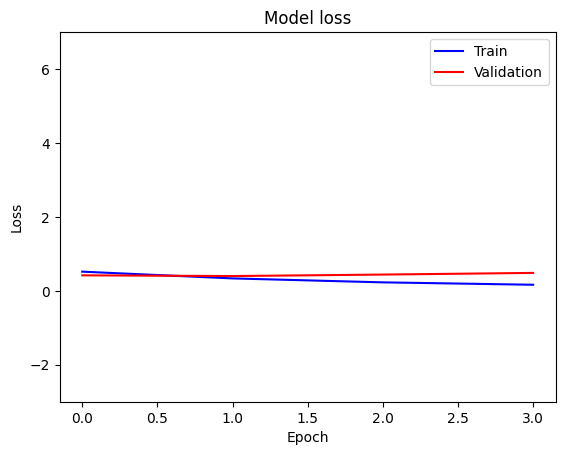

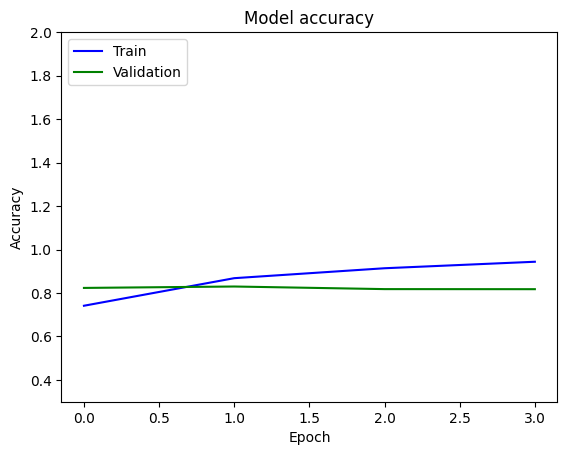

In [49]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'], color='blue')
plt.plot(history.history['val_loss'], color='red')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.ylim(-3, 7)
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], color ='blue')
plt.plot(history.history['val_accuracy'], color='green')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.ylim(0.3, 2)
plt.show()

In [50]:
predictions = model.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

y_pred = (predictions > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

92/92 [==============================] - 8s 75ms/step
Accuracy: 0.8299180327868853
F1 Score: 0.8658405172413792
Precision: 0.8815139879319802
Recall: 0.8507146638433033
